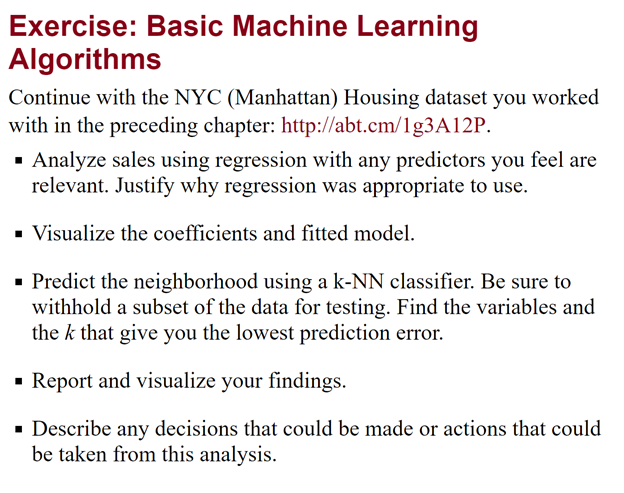

Manhattan, New York City Sales Data from March 2017 to February 2018: http://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from bokeh.plotting import figure, show
from bokeh.io import output_notebook

from bokeh.resources import INLINE
output_notebook(resources=INLINE)

Loading BokehJS ...

In [2]:
# read input dataset
df_sales = pd.read_csv('rollingsales_manhattan.csv')
df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,28,,C4,738 EAST 6TH STREET,,10009,11,0,11,"1,750","6,500",1900,2,C4,"3,750,000",4/3/2017
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,36,,C7,27 AVENUE C,,10009,24,1,25,"2,650","9,960",1910,2,C7,"5,235,000",7/11/2017
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,5,,C2,151 AVENUE B,,10009,5,0,5,"2,139","4,416",1900,2,C2,0,6/16/2017
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,"1,633","6,440",1900,2,C2,"6,625,000",7/19/2017
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,400,61,,C7,193 EAST 4TH STREET,,10009,11,1,12,"2,388","8,045",1900,2,C7,"7,675,000",11/13/2017


In [3]:
df_sales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,17982.0,17982.000000,17982.000000,17982.000000,17982.000000,17982.000000,17982.000000
mean,1.0,1122.626404,773.593260,10030.262318,0.199644,1726.438160,2.116172
std,0.0,529.631040,939.961758,112.783051,3.008074,626.097022,0.525122
min,1.0,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,796.000000,29.000000,10013.000000,0.000000,1910.000000,2.000000
50%,1.0,1171.000000,1003.000000,10022.000000,0.000000,1939.000000,2.000000
75%,1.0,1458.000000,1205.000000,10028.000000,0.000000,1974.000000,2.000000
max,1.0,2250.000000,9099.000000,10463.000000,229.000000,2017.000000,4.000000


In [4]:
# perform basic data cleaning by removing "," in numberic columns
df_sales['LAND SQUARE FEET'] = df_sales.apply(lambda x: x['LAND SQUARE FEET'].replace(",", ""), axis=1)
df_sales['GROSS SQUARE FEET'] = df_sales.apply(lambda x: x['GROSS SQUARE FEET'].replace(",", ""), axis=1)
df_sales[' SALE PRICE '] = df_sales.apply(lambda x: x[' SALE PRICE '].replace(",", ""), axis=1)

In [5]:
# check the column datatype 
df_sales.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                 object
COMMERCIAL UNITS                   int64
TOTAL UNITS                       object
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
 SALE PRICE                       object
SALE DATE                         object
dtype: object

In [6]:
# convert the possible columns to numeric columns
df_sales[['LAND SQUARE FEET', 'GROSS SQUARE FEET', ' SALE PRICE ']] = df_sales[['LAND SQUARE FEET', 'GROSS SQUARE FEET', ' SALE PRICE ']].apply(pd.to_numeric)

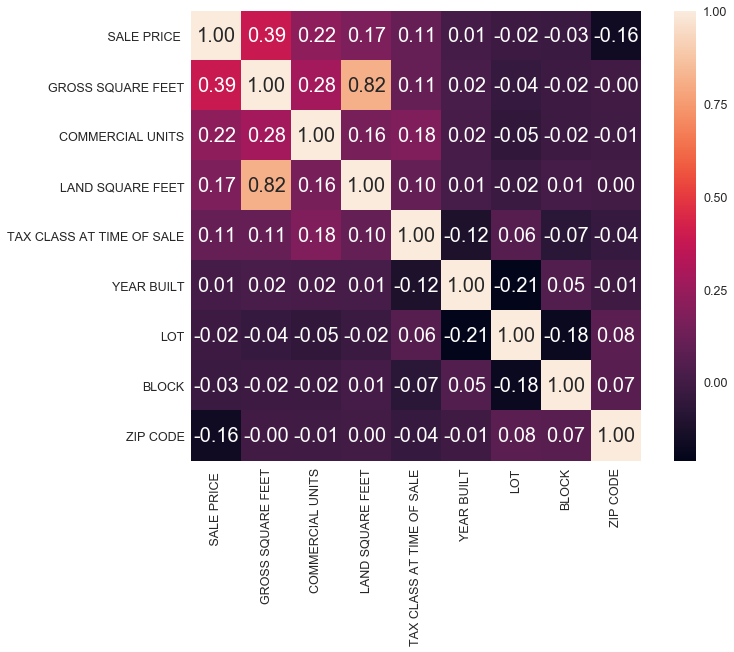

In [7]:
# correlation matrix

corrmat = df_sales.corr()
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, ' SALE PRICE ')[' SALE PRICE '].index
cm = np.corrcoef(df_sales[cols].values.T)

sns.set(font_scale=1.25)
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)

hm = sns.heatmap(cm, cbar=True, annot=True, ax=ax,
                 square=True, fmt='.2f', annot_kws={'size': 20}, 
                 yticklabels=cols.values, xticklabels=cols.values)

plt.show()

In [8]:
# according to our preliminary assumption we understand the below columns are more correlated to " SALE PRICE "

# 1) GROSS SQUARE FEET   
# 2) COMMERCIAL UNITS
# 3) LAND SQUARE FEET

In [9]:
# perform some basic data cleaning for the correlated columns
df_sales = df_sales[df_sales[' SALE PRICE '].values >= 1000]
df_sales = df_sales[df_sales['LAND SQUARE FEET'].values > 0]
df_sales = df_sales[df_sales['GROSS SQUARE FEET'].values > 0]
df_sales = df_sales[df_sales['COMMERCIAL UNITS'].values > 0]

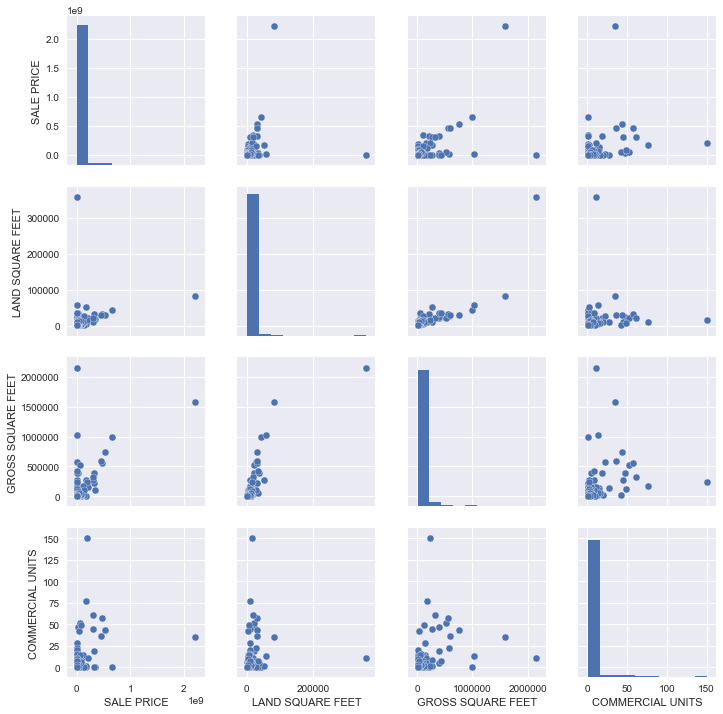

In [10]:
#scatterplot
sns.set()
cols = [' SALE PRICE ', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'COMMERCIAL UNITS'  ]
sns.pairplot(df_sales[cols], size = 2.5)
plt.show();

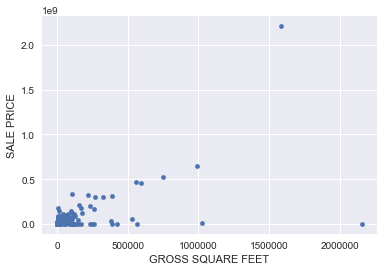

In [11]:
# bivariate analysis saleprice/grlivarea
var = 'GROSS SQUARE FEET'
data = pd.concat([df_sales[' SALE PRICE '], df_sales[var]], axis=1)
data.plot.scatter(x=var, y=' SALE PRICE ');
plt.show()

In [12]:
# to reduce the range drop the record with highest 'SALE PRICE'value using its index
df_sales = df_sales.drop(df_sales[' SALE PRICE '].idxmax())
df_sales = df_sales.drop(df_sales['GROSS SQUARE FEET'].idxmax())

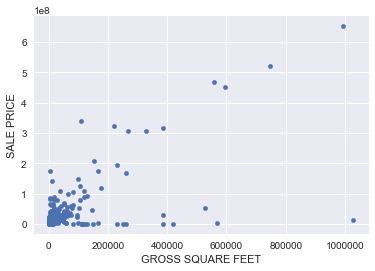

In [15]:
# bivariate analysis saleprice/grlivarea
var = 'GROSS SQUARE FEET'
data = pd.concat([df_sales[' SALE PRICE '], df_sales[var]], axis=1)
data.plot.scatter(x=var, y=' SALE PRICE ');
plt.show()

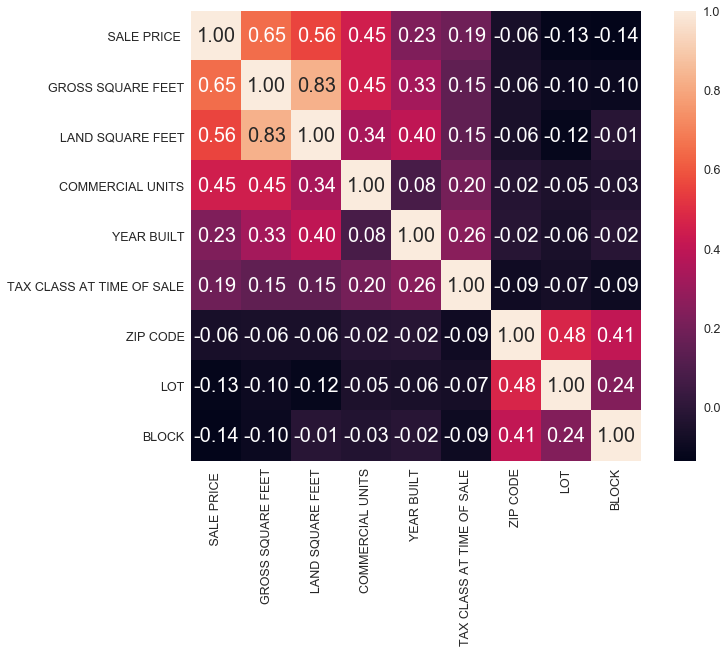

In [16]:
# correlation matrix
corrmat = df_sales.corr()
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, ' SALE PRICE ')[' SALE PRICE '].index
cm = np.corrcoef(df_sales[cols].values.T)

sns.set(font_scale=1.25)
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)

hm = sns.heatmap(cm, cbar=True, annot=True, ax=ax,
                 square=True, fmt='.2f', annot_kws={'size': 20}, 
                 yticklabels=cols.values, xticklabels=cols.values)

plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
df_sales = df_sales[['GROSS SQUARE FEET', ' SALE PRICE ' ]]
df_sales.head()

,GROSS SQUARE FEET,SALE PRICE
1,9960,5235000
4,8045,7675000
141,6560,5100000
142,3713,4750000
144,5399,6750000


In [19]:
# create a training and test datasets 
X = df_sales[['GROSS SQUARE FEET']]
y = df_sales[[ ' SALE PRICE ' ]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
# create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training dataset
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# the coefficients
print('Coefficients:', regr.coef_)

# the mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Coefficients: [[ 617.76750795]]
Mean squared error: 6112413473758265.00


In [21]:
"""
# plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()
"""

"\n# plot outputs\nplt.scatter(X_test, y_test,  color='black')\nplt.plot(X_test, y_pred, color='blue', linewidth=2)\n\nplt.xticks(())\nplt.yticks(())\n\nplt.show()\n"

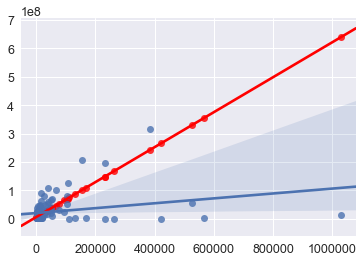

In [22]:
sns.regplot(x=X_test['GROSS SQUARE FEET'].values, y=y_pred[:, 0], color='red')
sns.regplot(x=X_test['GROSS SQUARE FEET'].values, y=y_test[' SALE PRICE '].values, fit_reg=True)

plt.show()

In [ ]:
"""
# We may use this code for further analysis

# identify columns with unique value and also identify categorical columns
for i in df_sales.columns:
    print (i, '--------------->',len(set(df_sales[i])))

# we can drop columns like BOROUGH, EASE-MENT as they have only one unique value
df_sales = df_sales.drop(['BOROUGH', 'EASE-MENT'], axis=1)

# convert the highly cardinal categorical columns to one-hot notation    
cols_to_transform = ['TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE' ]
df_sales_with_dummies = pd.get_dummies(data = df_sales, columns = cols_to_transform)

# check the correlation
corrmat = df_sales_with_dummies.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

"""